Getting started my importing our ATAC dataset (chromatin accesability)

In [30]:
import pandas as pd
import matplotlib as plt
import sklearn as sk

atac_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv")


In [6]:
atac_raw.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,0.71,...,0.10,0.10,3.19,1.37,0.52,1.27,0.10,0.57,3.27,1.41
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,1.64,...,1.70,0.10,1.41,0.47,0.11,0.92,0.98,2.16,2.34,0.94
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,2.36,0.10,...,0.87,0.54,2.72,0.95,0.11,63.38,8.92,1.33,1.04,0.11
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,0.41,0.10,...,0.44,1.83,0.66,0.11,0.92,13.50,0.98,1.28,1.04,0.11
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,0.41,0.10,...,0.44,0.10,0.66,1.79,0.51,0.92,0.75,1.33,1.61,4.50


let's identify and select the cell populations of our interest

In [7]:
atac_raw.columns

Index(['ImmGenATAC1219.peakID', 'chrom', 'Summit',
       'mm10.60way.phastCons_scores', '_-log10_bestPvalue',
       'Included.in.systematic.analysis', 'TSS', 'genes.within.100Kb',
       'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM',
       'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM',
       'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp',
       'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp',
       'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
       'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
       'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
       'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
       'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
       'Tgd.g2+d17.24a+.Th',

In [14]:
atac_ilc = atac_raw[['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI']]

now let'see whatwe're working with

In [15]:
atac_ilc.head

<bound method NDFrame.head of         NK.27+11b-.BM  NK.27+11b+.BM  NK.27-11b+.BM  NK.27+11b-.Sp  \
0                0.82           0.22           2.00           0.81   
1                1.46           0.22           0.12           0.14   
2                0.20           1.00           0.12           0.14   
3                1.72           1.07           0.73           0.76   
4                0.20           0.22           0.12           0.14   
...               ...            ...            ...            ...   
512590           6.33           2.48           8.34           2.04   
512591           4.82           4.98           6.55           4.48   
512592           2.48           2.29           2.00           1.43   
512593           1.72           0.22           0.12           0.14   
512594           2.48           0.22           1.28           0.14   

        NK.27+11b+.Sp  NK.27-11b+.Sp  ILC2.SI  ILC3.NKp46-CCR6-.SI  \
0                2.43           1.27     1.79              

In [16]:
atac_ilc.columns

Index(['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI'],
      dtype='object')

In [17]:
len(atac_ilc.columns)   

10

10 populations of interest, including NK and ILC cells

Checking if my data is clean to work with

In [18]:
print(atac_ilc.isnull().sum())

NK.27+11b-.BM          0
NK.27+11b+.BM          0
NK.27-11b+.BM          0
NK.27+11b-.Sp          0
NK.27+11b+.Sp          0
NK.27-11b+.Sp          0
ILC2.SI                0
ILC3.NKp46-CCR6-.SI    0
ILC3.NKp46+.SI         0
ILC3.CCR6+.SI          0
dtype: int64


In [19]:
atac_raw = atac_raw.dropna()

time to cluster and look for patterns

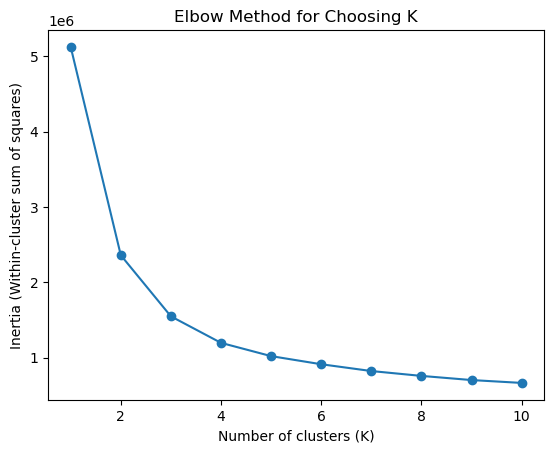

KMeans(n_clusters=3, random_state=42)

In [31]:
# Import required libraries at the top
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
atac_selected = scaler.fit_transform(atac_ilc)

# Elbow method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(atac_selected)
    inertia.append(model.inertia_)

# Plot the "elbow"
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Choosing K')
plt.show()

# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(atac_selected)


In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(atac_selected)

KMeans(n_clusters=3, random_state=42)

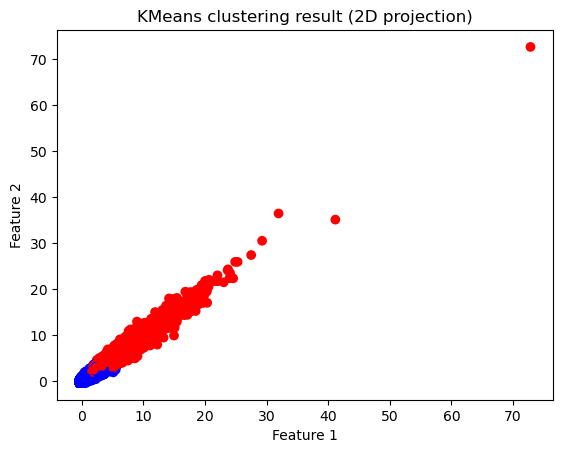

In [51]:
plt.scatter(atac_selected[:, 0], atac_selected[:, 1], c=kmeans.labels_, cmap='bwr')
plt.title("KMeans clustering result (2D projection)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



before we continue with our analysis, let's try to interpret our scatter plot

In [52]:
print(atac_ilc.shape)


(512595, 10)


that means we have 512.595 peaks of 10 populations. so far we have clustered PEAKS and displayed the results likely across 2 cell populations. What that could tells us- groups of peaks with similar accessibility profiles across samples OR candidate regulatory regions that respond similarly to cell type, condition, or time point. What we could hypothesize for now - 2 distinct clusters across 2 samples. Diagonal shape suggest co-regualtion across the the 2 cell types, or at least same role in different cells whic is to be expected. However the graph is unreliable so we have to take steps to correct that and use different methods. let's jump to alternative evaluations and/or dimension reduction.

In [2]:
import scanpy as sc 


In [3]:
import sklearn as sk

In [5]:
import matplotlib.pyplot as plt 

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming atac_ilc is a DataFrame with cells × peaks
X = atac_ilc.values

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Create a DataFrame for easy plotting
df_pca = pd.DataFrame(components, columns=['PC1', 'PC2'])

# Optional: Add labels (e.g., cell types)
# df_pca['label'] = your_labels  # Uncomment and set your labels

# Plot
plt.figure(figsize=(6, 5))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=your_labels, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of ATAC-seq ILC Data')
plt.colorbar(scatter, label='Cell type or cluster')
plt.tight_layout()
plt.show()


NameError: name 'atac_ilc' is not defined